## **DIRECT SAMPLING**

## **Pi-Calculation**

In [1]:
import random
from numba import njit
@njit
def direct_pi(n):    #Function to calculate Pi value
    nhits = 0
    for i in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 < 1:
            nhits += 1
    return 4 * nhits/n
print("Pi value =",direct_pi(10000000))

Pi value = 3.1411612


# **Uniform Sample from Circle**

In [2]:
import numpy as np
def Uniform_circle(n):
    X = []
    Y = []
    for i in range(n):
        while True:
            x = random.uniform(-1, 1)
            y = random.uniform(-1, 1)
            if x**2 + y**2 < 1:
                X.append(x)
                Y.append(y)
                break
    return np.array(X), np.array(Y)

In [3]:
X, Y = Uniform_circle(1000)

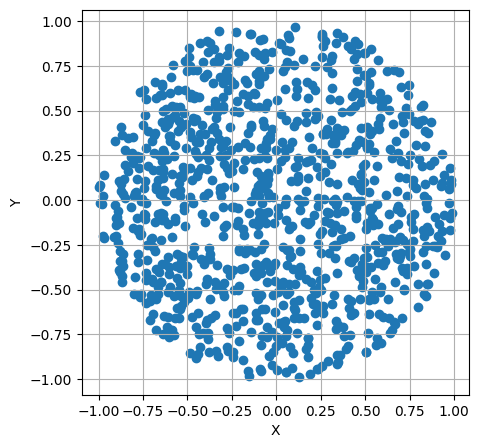

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

## **Average Distance between any two points on a circle**

In [5]:
N_trials = 100000
X1, Y1 = Uniform_circle(N_trials)
X2, Y2 = Uniform_circle(N_trials)
Distance = np.sqrt((X2 - X1)**2 + (Y2 - Y1)**2)
print("Average Distance =",np.mean(Distance))

Average Distance = 0.9065586611255999


## **Probability of a triangle to be acute angled**

In [6]:
PX, PY = Uniform_circle(N_trials)
QX, QY = Uniform_circle(N_trials)
RX, RY = Uniform_circle(N_trials)
A = np.sqrt((PX - QX)**2 + (PY - QY)**2)
B = np.sqrt((PX - RX)**2 + (PY - RY)**2)
C = np.sqrt((RX - QX)**2 + (RY - QY)**2)
acute = 0
for i in range(N_trials):
    a, b, c = A[i], B[i], C[i]
    sides = [a, b, c]
    anew = np.max(sides)
    sides.remove(anew)
    bnew, cnew = sides
    if anew**2 < bnew**2 + cnew**2:
        acute += 1
print("probability = ",acute/N_trials)

probability =  0.27951


# **Exercise-1.1**

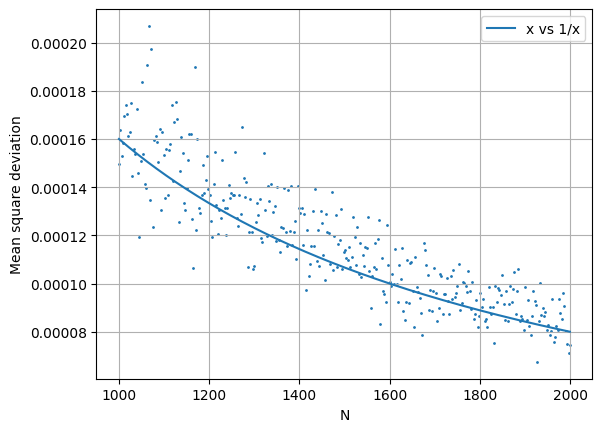

In [7]:
import matplotlib.pyplot as plt

def direct_pi_mse(N, runs=200):
    sqdev = []
    for _ in range(runs):
        x = np.random.rand(N)
        y = np.random.rand(N)
        hits = np.sum(x*x + y*y <= 1.0)
        p = hits / N
        sqdev.append((p - np.pi/4)**2)
    return np.mean(sqdev)

Ns = np.array([ i for i in range(1000, 2000, 3)])
mses = [direct_pi_mse(N) for N in Ns]

plt.scatter(Ns, mses, s = 1)
plt.plot(Ns, 0.16/Ns, label = 'x vs 1/x')
plt.xlabel('N')
plt.ylabel('Mean square deviation')
plt.grid(True)
plt.legend()
plt.show()

# **Bonus**

## **Average number of throws to get all values of a dice**

In [8]:
@njit
def avg_throws(n):
    time = 0
    for i in range(n):
        List = [1, 2, 3, 4, 5, 6]
        while List:
            number = random.randint(1, 6)
            time += 1
            if number in List:
                List.remove(number)
    return time/n

In [9]:
print("Average number of throws = ",avg_throws(100000))

Average number of throws =  14.71682


# **Markov_pi**

In [10]:
@njit
def Markov_pi(n, delta):
    hits = 0
    x, y = 1, 1
    for i in range(n):
        dx, dy = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + dx) < 1 and abs(y + dy) < 1:
            x = x + dx
            y = y + dy
        if x**2 + y**2 < 1:
            hits += 1
    return 4 * hits/n

In [11]:
print("Pi value calculated using markov chain =",Markov_pi(100000, 0.3))

Pi value calculated using markov chain = 3.11572


## **Exercise-1.2**

In [12]:
import numpy as np

def markov_pi(N, delta):
    x, y = 1.0, 1.0          # initial condition (clubhouse)
    Nhits = 0
    rejected = 0

    for _ in range(N):
        dx = np.random.uniform(-delta, delta)
        dy = np.random.uniform(-delta, delta)

        if abs(x + dx) < 1 and abs(y + dy) < 1:
            x += dx
            y += dy
        else:
            rejected += 1

        if x*x + y*y < 1:
            Nhits += 1

    return Nhits / N, rejected / N

In [15]:
delta = 0.3
N = 10000
p_est, rej = markov_pi(N, delta)

print("Estimate of π:", 4*p_est)
print("Rejection rate:", rej)


Estimate of π: 3.1588
Rejection rate: 0.1396


In [16]:
import matplotlib.pyplot as plt
def mse_and_rejection(N, deltas, runs=20):
    mse = []
    rejection = []

    for delta in deltas:
        err = []
        rej = []
        for _ in range(runs):
            p, r = markov_pi(N, delta)
            err.append((p - np.pi/4)**2)
            rej.append(r)

        mse.append(np.mean(err))
        rejection.append(np.mean(rej))

    return np.array(mse), np.array(rejection)


In [22]:
N = 5000
deltas = np.linspace(0.02, 1, 25)

mse, rejection = mse_and_rejection(N, deltas)


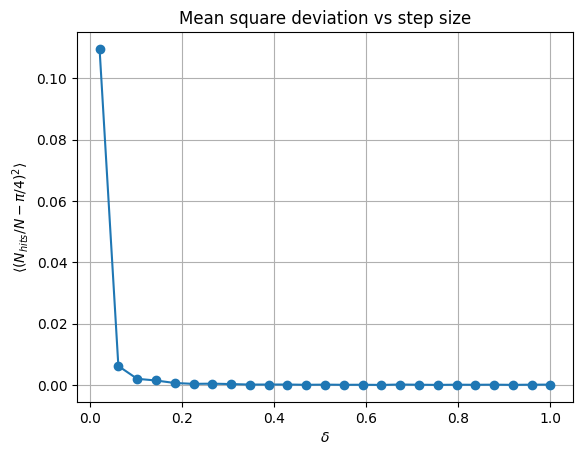

In [23]:
plt.plot(deltas, mse, 'o-')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\langle (N_{hits}/N - \pi/4)^2 \rangle$')
plt.title('Mean square deviation vs step size')
plt.grid()
plt.show()


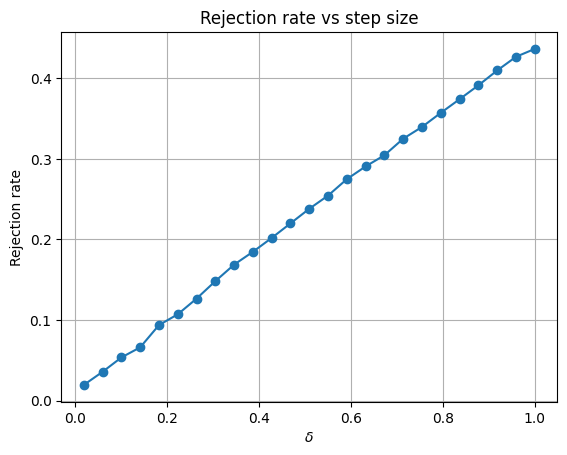

In [24]:
plt.plot(deltas, rejection, 'o-')
plt.xlabel(r'$\delta$')
plt.ylabel('Rejection rate')
plt.title('Rejection rate vs step size')
plt.grid()
plt.show()


## **Direct_needle**

In [27]:
def direct_needle(a, b, n):
    Nhits = 0
    for i in range(n):
        xcen = random.uniform(0, b/2)
        phi = random.uniform(0, np.pi/2)
        xtip = xcen - a/2*np.cos(phi)
        if xtip < 0:
            Nhits += 1
    frac = Nhits/n
    return 2*a/(b*frac)

In [29]:
direct_needle(1, 1.3, 100000)

3.130581239365807

In [30]:
def direct_needle_patch(a, b, n):
    Nhits = 0
    for i in range(n):
        xcen = random.uniform(0, b/2)
        dx, dy = random.random(), random.random()
        Upsilon = np.sqrt(dx**2 + dy**2)
        xtip = xcen - a/2*dx/Upsilon
        if xtip < 0:
            Nhits += 1
    frac = Nhits/n
    return 2*a/(b*frac)

In [35]:
direct_needle_patch(1, 4, 1000000)

3.0884978164320436